In [2]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.5/38.1 MB 6.6 MB/s eta 0:00:06
   - -------------------------------------- 1.0/38.1 MB 9.0 MB/s eta 0:00:05
   - -------------------------------------- 1.6/38.1 MB 9.0 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/38.1 MB 10.3 MB/s eta 0:00:04
   -- ------------------------------------- 2.6/38.1 MB 10.5 MB/s eta 0:00:04
   --- ------------------------------------ 3.1/38.1 MB 10.4 MB/s eta 0:00:04
   --- ------------------------------------ 3.5/38.1 MB 10.3 MB/s eta 0:00:04
   ---- ----------------------------------- 4.0/38.1 MB 10.3 MB/s eta 0:00:04
   ---- ---

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('./test_images/OIP.jpeg')
img.shape

(274, 198, 3)

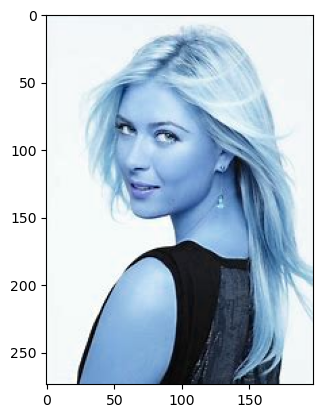

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(274, 198)

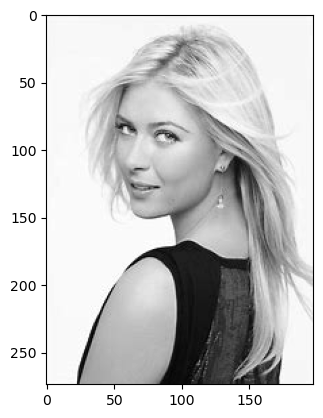

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[28, 55, 88, 88]])

array([[x, y, width, height]])

In [7]:
(x,y,w,h)=faces[0]
x,y,w,h

(28, 55, 88, 88)

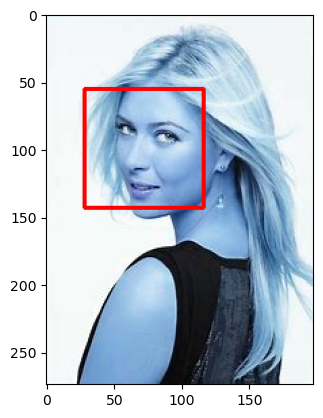

In [8]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

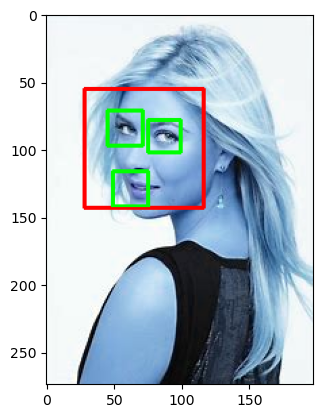

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h)in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

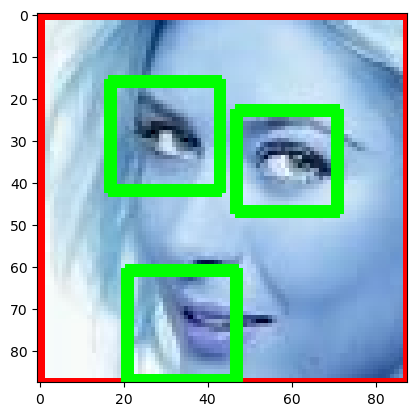

In [10]:
plt.imshow(roi_color,cmap='gray')

In [11]:
def get_cropped_image(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

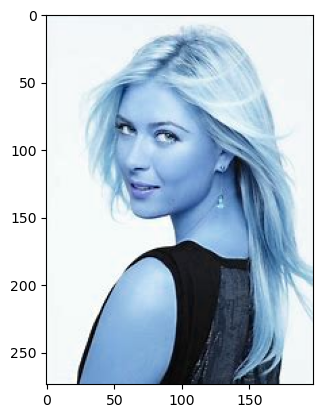

In [12]:
original_image=cv2.imread('./test_images/OIP.jpeg')
plt.imshow(original_image)

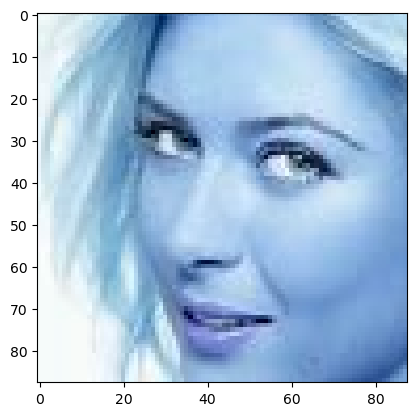

In [24]:
cropped_image=get_cropped_image('./test_images/OIP.jpeg')
plt.imshow(cropped_image)

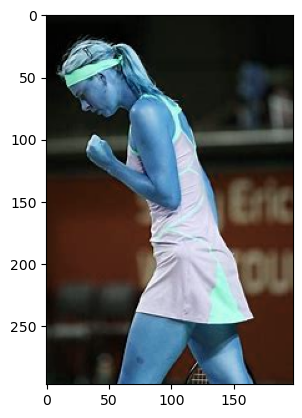

In [14]:
org_image=cv2.imread('./test_images/OIP1.jpeg')
plt.imshow(org_image)

In [15]:
cropped_image=get_cropped_image('./test_images/OIP1.jpeg')
cropped_image

nothing should be returned because two eyes are not clearly visible in the image

In [16]:
path_to_data="./data/"
path_to_cr_data="./data/cropped/"

In [17]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./data/lionel_messi',
 './data/maria_sharapova',
 './data/roger_federer',
 './data/serena_williams',
 './data/virat']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dir=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dir.append(cropped_folder)
                print("generating cropped images in folder:",cropped_folder)
                
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

lionel_messi
generating cropped images in folder: ./data/cropped/lionel_messi
maria_sharapova
generating cropped images in folder: ./data/cropped/maria_sharapova
roger_federer
generating cropped images in folder: ./data/cropped/roger_federer
serena_williams
generating cropped images in folder: ./data/cropped/serena_williams
virat
generating cropped images in folder: ./data/cropped/virat


In [21]:
import numpy as np
import pywt
import cv2

In [22]:
def w2d(img,mode='haar',level=1):
    imArray=img
    
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray/=255;
    
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H*=255;
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H

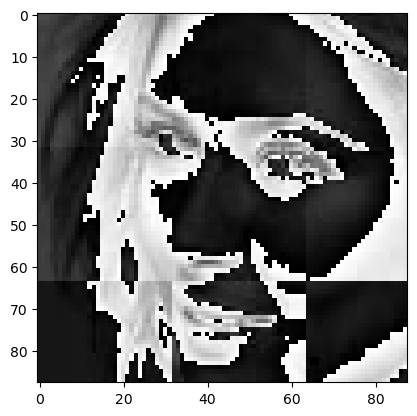

In [25]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [26]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dir:
    celebrity_name=img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'lionel_messi': ['./data/cropped/lionel_messi\\lionel_messi1.png',
  './data/cropped/lionel_messi\\lionel_messi10.png',
  './data/cropped/lionel_messi\\lionel_messi11.png',
  './data/cropped/lionel_messi\\lionel_messi12.png',
  './data/cropped/lionel_messi\\lionel_messi13.png',
  './data/cropped/lionel_messi\\lionel_messi14.png',
  './data/cropped/lionel_messi\\lionel_messi15.png',
  './data/cropped/lionel_messi\\lionel_messi16.png',
  './data/cropped/lionel_messi\\lionel_messi17.png',
  './data/cropped/lionel_messi\\lionel_messi18.png',
  './data/cropped/lionel_messi\\lionel_messi19.png',
  './data/cropped/lionel_messi\\lionel_messi2.png',
  './data/cropped/lionel_messi\\lionel_messi20.png',
  './data/cropped/lionel_messi\\lionel_messi21.png',
  './data/cropped/lionel_messi\\lionel_messi22.png',
  './data/cropped/lionel_messi\\lionel_messi23.png',
  './data/cropped/lionel_messi\\lionel_messi24.png',
  './data/cropped/lionel_messi\\lionel_messi25.png',
  './data/cropped/lionel_messi\\

In [27]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1

class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat': 4}

In [28]:
x=[]
y=[]

for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [29]:
len(x)

161

In [30]:
32*32*3 + 32*32


4096

In [31]:
len(x[0])

4096

In [32]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(161, 4096)

In [33]:
x[0]

array([52., 46., 47., ...,  0.,  0.,  0.])

### Model Building

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [36]:
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [37]:
pipe.score(x_test,y_test)

0.7804878048780488

In [38]:
len(x_test)

41

In [39]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.83      0.94      0.88        16
           2       0.50      0.17      0.25         6
           3       0.75      0.86      0.80         7
           4       0.67      0.67      0.67         3

    accuracy                           0.78        41
   macro avg       0.71      0.70      0.69        41
weighted avg       0.75      0.78      0.75        41



In [40]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [41]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [42]:
scores=[]
best_estimators={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.800000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.625000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.866667,{'logisticregression__C': 1}


In [43]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [44]:
best_estimators['svm'].score(x_test,y_test)

0.8292682926829268

In [45]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8536585365853658

In [46]:
best_clf=best_estimators['svm']

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[ 8,  0,  0,  0,  1],
       [ 0, 16,  0,  0,  0],
       [ 0,  2,  3,  1,  0],
       [ 0,  1,  1,  5,  0],
       [ 1,  0,  0,  0,  2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

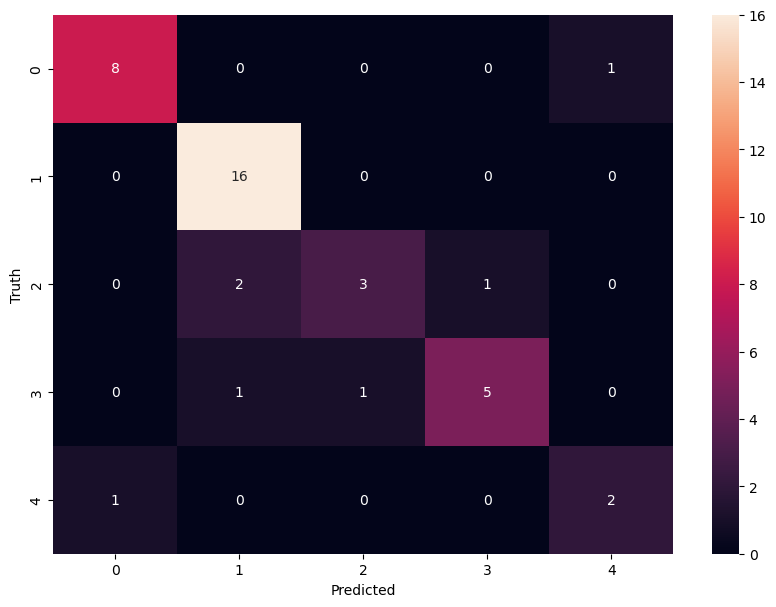

In [49]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat': 4}

### save the trained model

In [51]:
!pip install joblib

In [52]:
import joblib

In [54]:
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [55]:
import json
with open("class_dictionary.json","w")as f:
    f.write(json.dumps(class_dict))